# Anime Recommendations Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Basic Exploration

In [5]:
anime_df = pd.read_csv('./data/anime.csv')
rating_df = pd.read_csv('./data/rating.csv')

In [6]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [8]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [10]:
anime_df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [11]:
anime_df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [19]:
anime_df.describe(include='object')

,name,genre,type,episodes
count,12294,12232,12269,12294
unique,12292,3264,6,187
top,Saru Kani Gassen,Hentai,TV,1
freq,2,823,3787,5677


In [12]:
anime_df.shape

(12294, 7)

In [7]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [14]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [15]:
rating_df.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [16]:
rating_df.shape

(7813737, 3)

## Handling null values

In [25]:
anime_df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [29]:
anime_df.shape

(12294, 7)

In [31]:
anime_df = anime_df.dropna()

In [32]:
anime_df.shape

(12017, 7)

In [34]:
rating_df.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

## Duplicates

In [39]:
anime_df[anime_df.duplicated()].shape[0]

0

In [40]:
rating_df[rating_df.duplicated()].shape[0]

1

In [42]:
rating_df = rating_df.drop_duplicates(keep='first')

## Merging datasets

In [44]:
anime_df.shape

(12017, 7)

In [45]:
rating_df.shape

(7813736, 3)

In [46]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [49]:
df = pd.merge(anime_df, rating_df, how='inner', on='anime_id', suffixes=[None, '_user'])
df = df.rename(columns={"rating_user": "user_rating"})
df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


# Visualizations

In [50]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'user_id', 'user_rating'],
      dtype='object')

In [ ]:
# Drop duplicates for visualization
df_uniques = df.copy()
df_uniques = df_uniques.drop_duplicates(subset='name', keep='first')
df_uniques.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10
26773,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,39,-1
28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9
47442,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5,9


### Top Community

In [116]:
df_top_community = df_uniques.nlargest(14, 'members')
df_top_community

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
344257,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,3,10
568937,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229,1,-1
3160071,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100,1,10
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10
1007976,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796,1,-1
159820,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151,7,9
3277901,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297,1,-1
28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9
2127655,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190,4,-1
856697,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817,1,-1


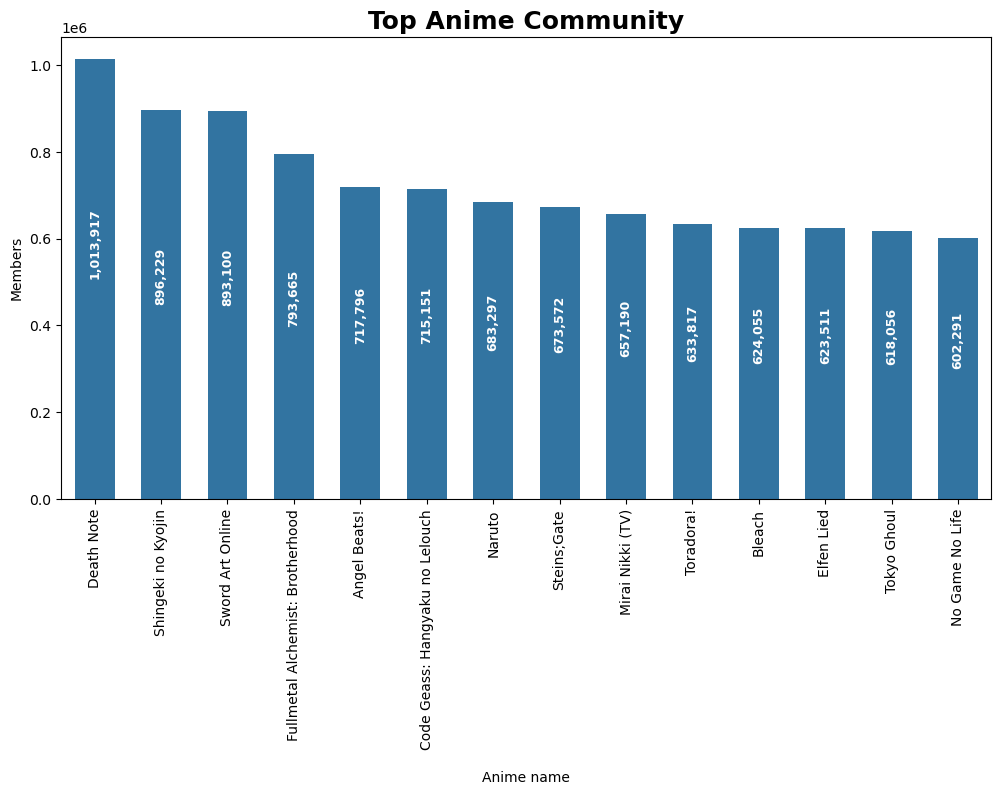

In [123]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_top_community, x='name', y='members', width=0.6)

for pos, (i, row) in enumerate(df_top_community.iterrows()):
    plt.text(pos, row['members'] * 0.5, f"{int(row['members']):,}", ha='center', va='bottom', fontsize=9, rotation=90, color='#fff', fontweight='bold')

plt.title('Top Anime Community', fontsize=18, fontweight='bold')
plt.xlabel('\nAnime name')
plt.ylabel('Members')
plt.xticks(rotation=90)
plt.show()

### Categories

In [100]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'user_id', 'user_rating'],
      dtype='object')

In [127]:
df_categories = df_uniques['type'].value_counts()

In [131]:
df_categories.index

Index(['TV', 'OVA', 'Movie', 'Special', 'ONA', 'Music'], dtype='object', name='type')

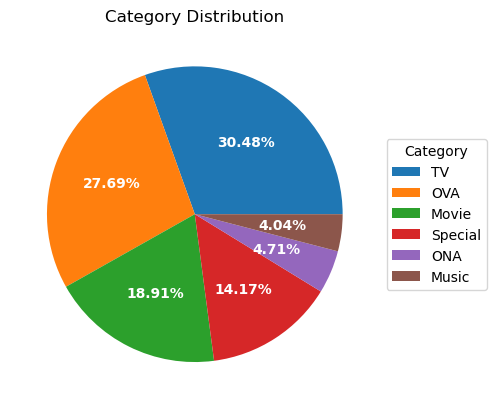

In [ ]:
wedges, _, autotexts = plt.pie(df_categories, autopct='%.2f%%')

# Agregar la leyenda con las categorías
plt.legend(
    wedges,
    df_categories.index,
    title="Category",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# change percentage styles
for autotext in autotexts:
    autotext.set_color('#fff')
    autotext.set_fontweight('bold')

plt.title('Category Distribution')
plt.show()

## Animes per Category

In [154]:
df_animes_per_cat = df_uniques.groupby('type')['name'].count().sort_values(ascending=False)
df_animes_per_cat

type
TV         3402
OVA        3090
Movie      2111
Special    1581
ONA         526
Music       451
Name: name, dtype: int64

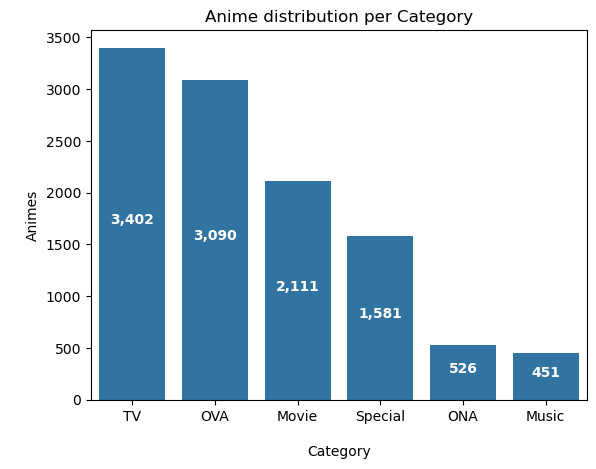

In [186]:
sns.barplot(data=df_animes_per_cat)

for index in df_animes_per_cat.index:
    plt.text(index, df_animes_per_cat[index] * 0.5, f"{int(df_animes_per_cat[index]):,}", ha='center', color='#fff', fontweight='bold')

plt.title('Anime distribution per Category')
plt.xlabel('\nCategory')
plt.ylabel('\nAnimes')
plt.show()

# Overall ratings

In [ ]:
df_uniques['rating']

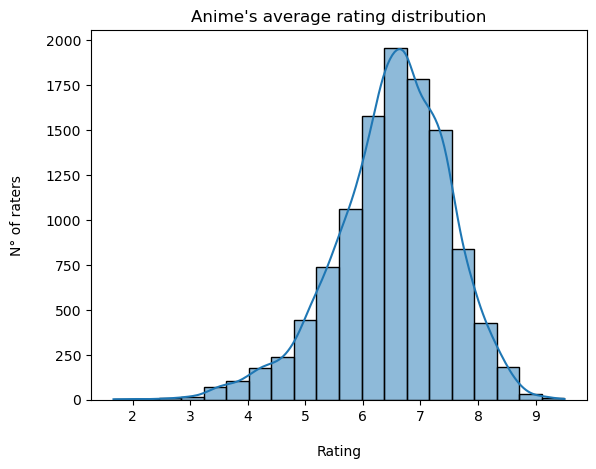

In [192]:
sns.histplot(data=df_uniques, x='rating', kde=True, bins=20)

plt.title("Anime's average rating distribution")
plt.xlabel('\nRating')
plt.ylabel('N° of raters\n')
plt.show()

### User's anime ratings distribution

In [193]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'user_id', 'user_rating'],
      dtype='object')

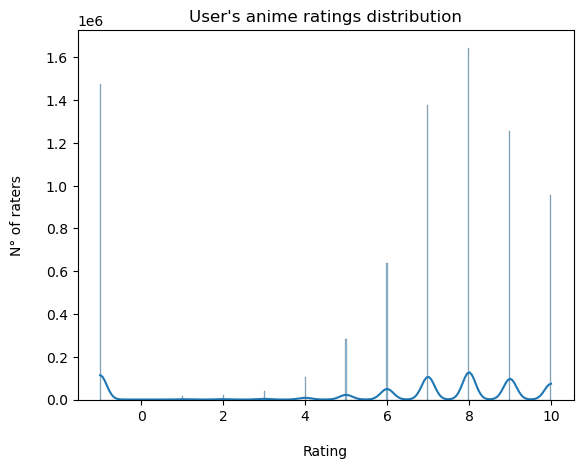

In [198]:
sns.histplot(data=df, x='user_rating', kde=True)

plt.title("User's anime ratings distribution")
plt.xlabel('\nRating')
plt.ylabel('N° of raters\n')
plt.show()

## Top animes based on ratings

In [211]:
df_top_by_rating = df_uniques.nlargest(14, 'rating').set_index('name', drop=False)
df_top_by_rating

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
name,,,,,,,,,
Mogura no Motoro,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62,48766,-1
Kimi no Na wa.,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
Fullmetal Alchemist: Brotherhood,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10
Gintama°,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,39,-1
Yakusoku: Africa Mizu to Midori,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25,53,48766,-1
Steins;Gate,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9
Gintama&#039;,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5,9
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,17,9
Hunter x Hunter (2011),11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,7,9


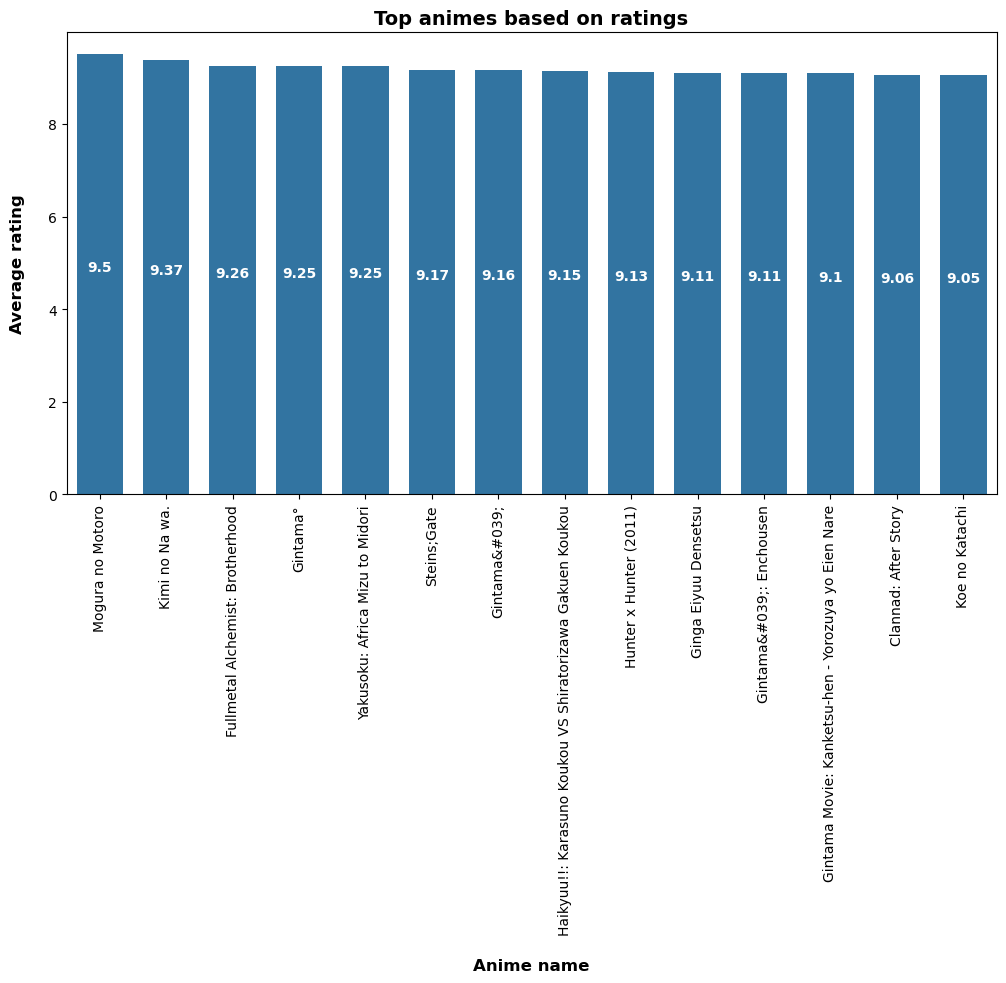

In [218]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_top_by_rating, x='name', y='rating', width=0.7)

for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, height * 0.5, f"{height:,}", ha='center', va='bottom', fontsize=10, color='#fff', fontweight='bold')

plt.xticks(rotation=90)
plt.title('Top animes based on ratings', fontweight='bold', fontsize='14')
plt.xlabel('\nAnime name', fontweight='semibold', fontsize='12')
plt.ylabel('Average rating\n', fontweight='semibold', fontsize='12')
plt.show()